![TrafficImage](https://images.pexels.com/photos/1600757/pexels-photo-1600757.jpeg)

# Overview of Feature Engineering on Traffic Data

### Objectives:
1. **Understand the Dataset**: Gain a comprehensive understanding of the data by examining its structure, variables, and basic statistics.
2. **Data Cleaning**: Identify and handle missing or erroneous data to ensure the integrity of our analysis.
3. **Descriptive Statistics**: Calculate and visualize summary statistics to get an overview of the data's central tendency and dispersion.
4. **Traffic Analysis**: Explore the distribution of traffic density, vehicle counts, and other relevant metrics across different times and locations.
5. **Trends Over Time**: Analyze the trends in traffic data over time to identify significant patterns and peak hours.
6. **Feature Engineering**: Create new features or transform existing ones to improve the performance of machine learning models.

### Methodology:
1. **Data Loading**: Load the traffic dataset into a pandas DataFrame for analysis.
2. **Data Cleaning**: Handle missing values, outliers, and inconsistencies in the data.
3. **Scaling Numerical Features**: Use `StandardScaler` to standardize numerical columns, ensuring they have a mean of 0 and a standard deviation of 1.
4. **Encoding Categorical Features**: Convert categorical columns into numerical format using one-hot encoding (`pd.get_dummies`).
5. **Dimensionality Reduction**: Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while preserving as much variance as possible.
6. **Feature Selection**: Use methods like `SelectKBest` to select the most important features based on statistical tests.
7. **Exploratory Visualizations**: Use visualizations such as histograms, bar plots, line charts, and scatter plots to explore the data.
8. **Statistical Analysis**: Apply statistical techniques to summarize the data and identify key trends.

### Key Findings:
- **Traffic Density Patterns**: Analyze traffic density patterns across different times of the day and days of the week.
- **Relationships with Other Variables**: Explore relationships between traffic density and other variables such as weather conditions, road types, and vehicle counts.
- **Peak Traffic Hours**: Identify peak traffic hours and potential causes of traffic congestion.
- **Impact of Events**: Assess the impact of special events or holidays on traffic patterns.

### Conclusion:
Feature engineering on traffic data provides valuable insights into traffic patterns and behaviors. By understanding these patterns, city planners and traffic management authorities can make informed decisions to improve traffic flow, reduce congestion, and enhance overall transportation efficiency.

# Importing Materials to build upon it

In [1]:
# Importing Necessary Libraries for our Feature Extraction!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
warnings.filterwarnings('ignore')

# Checking the Worth of the Dataset

In [2]:
# Here, we first increased the column width of our dataset and put it in our dataframe to view it using head method as "Description" column is quite lengthy.
pd.set_option("display.max_colwidth", 10000000000000000000000000000)
df = pd.read_csv("/kaggle/input/key-factors-traffic-accidents/traffic_accidents_dict new.csv")
df.head(10)

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.592,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive integer."
1,11,9.5564,3.2757,5.452,4.0540,1,478.623,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of USD."
2,19,7.5879,2.0989,6.697,345.0000,0,364.476,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 10 (high)."
3,23,6.3879,4.9188,9.412,4.7290,0,20.920,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to 1).
4,23,2.4042,1.9610,7.393,1.7111,1,37.378,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to 5 (excellent)."
5,31,2.4040,6.7137,5.411,5.9050,1,404.621,1.8936,689.0410,8.1801,urban_area,"Urban area (1) or rural area (0), as an integer."
6,29,1.5228,5.2316,9.326,2.3785,1,16.292,2.5213,237.9710,12.6622,average_speed,Average speed of vehicles in km/h.
7,18,8.7956,8.9864,4.784,1.9984,0,352.566,1.9072,968.0670,8.0602,rain_intensity,"Rain intensity, scale from 0 (no rain) to 3 (heavy rain)."
8,15,6.4100,1.6439,5.612,3.6090,1,217.198,3.4380,535.4440,8.2904,vehicle_count,"Estimated number of vehicles, in thousands, as an integer."
9,22,7.3727,8.0411,5.961,4.7650,1,409.261,2.0919,569.0560,203.5910,time_of_day,Time of day in 24-hour format (0 to 24).


# Getting Intel and Cleaning Dataset

In [3]:
# Gaining some insights on how this dataset using isnull().sum(), info() and describe() methods.
df.info()
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB
accidents              0
traffic_fine_amount    0
traffic_density        0
traffic_lights         0
pavement_quality       0
urba

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
count,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000
mean,20.625400,5.447824,14.252526,93.292068,22.442655,0.694381,214.642085,33.859295,453.234313,83.650263
std,5.228151,2.595654,75.965008,224.170457,112.193426,0.460695,168.707336,140.048354,313.882642,97.819456
min,5.000000,1.002000,0.240000,0.000000,0.000000,0.000000,0.970000,0.000000,1.026700,0.120000
25%,17.000000,3.195450,3.320775,3.775500,2.103350,0.000000,12.508500,1.668975,169.455750,6.514825
50%,21.000000,5.428500,5.563200,6.502500,3.276150,1.000000,223.125500,2.356450,453.982000,12.184300
75%,24.000000,7.675675,7.890175,9.226000,4.425700,1.000000,360.944750,3.704250,729.150250,174.777000
max,35.000000,9.997500,996.000000,999.000000,994.000000,1.000000,932.000000,999.000000,999.623000,999.000000


In [4]:
# Dropping Duplicates!
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Standardizing Our Dataset

In [5]:
# Here we are scaling numerical columns using "StandardScaler" and encoding categorical columns using pd.get_dummies to convert them into dummy variables, dropping the first category to avoid multicollinearity. This prepare the dataframe for the ML by ensuring the numerical features have a mean of 0 and a std dev of 1.
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,...,"Description_Estimated number of vehicles, in thousands, as an integer.","Description_Number of recorded accidents, as a positive integer.","Description_Pavement quality, scale from 0 (very poor) to 5 (excellent).",Description_Proportion of traffic lights in the area (0 to 1).,"Description_Rain intensity, scale from 0 (no rain) to 3 (heavy rain).",Description_Time of day in 24-hour format (0 to 24).,"Description_Traffic density index, scale from 0 (low) to 10 (high).","Description_Traffic fine amount, expressed in thousands of USD.","Description_Urban area (1) or rural area (0), as an integer.",Description_traffic_fine_amount
0,-0.119628,-0.414919,-0.157287,2.943053,-0.193183,0.663424,0.633974,-0.233253,-0.517348,0.784978,...,False,True,False,False,False,False,False,False,False,False
1,-1.841177,1.582957,-0.144507,-0.391867,-0.163911,0.663424,1.564816,-0.196824,1.524790,-0.764099,...,False,False,False,False,False,False,False,True,False,False
2,-0.310912,0.824531,-0.159999,-0.386313,2.875175,-1.507331,0.888180,-0.221371,1.200682,-0.798226,...,False,False,False,False,False,False,True,False,False,False
3,0.454221,0.362194,-0.122876,-0.374201,-0.157894,-1.507331,-1.148339,-0.226740,1.146751,0.488701,...,False,False,False,True,False,False,False,False,False,False
4,0.454221,-1.172652,-0.161814,-0.383208,-0.184795,0.663424,-1.050779,-0.229623,-1.439372,-0.784033,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,1.219354,-1.032371,-0.096237,-0.386728,-0.170119,0.663424,0.517843,-0.227628,-0.619108,-0.741163,...,False,False,False,False,False,False,False,False,False,False
8752,-0.502195,-0.841810,-0.164888,2.032980,-0.174662,0.663424,-1.235015,-0.182707,-0.499678,-0.680980,...,False,False,False,False,False,False,False,False,False,False
8753,1.984486,-1.111816,-0.075384,-0.403770,-0.170787,0.663424,1.572588,-0.221618,0.015856,1.115575,...,False,False,False,False,False,False,False,False,False,False
8754,-2.032460,1.607654,-0.169196,-0.404060,-0.148561,0.663424,0.392062,-0.196060,-0.973589,-0.818022,...,False,False,False,False,False,False,False,False,False,False


# Principal Components(2) Analysis

In [6]:
# We initialized the PCA to reduce it to principal components by applying it in our dataframe and create a new dataframe from those 2 principal columns.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-0.276881,2.066062
1,2.087531,-0.490011
2,0.639368,-0.464440
3,0.050617,-0.629149
4,-0.953798,-0.251536
...,...,...
8751,-1.582678,-0.151029
8752,-0.042574,1.113939
8753,-2.480143,0.101304
8754,2.522358,-0.291599


# Building Scatterplot

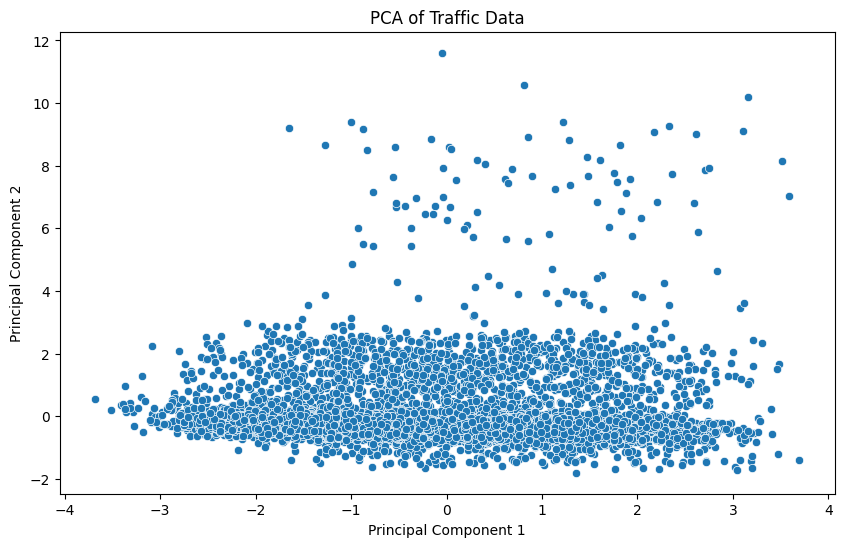

In [7]:
# Made a scatterplot using PCA1 and PCA2.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA of Traffic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Correlation Matrix of all features

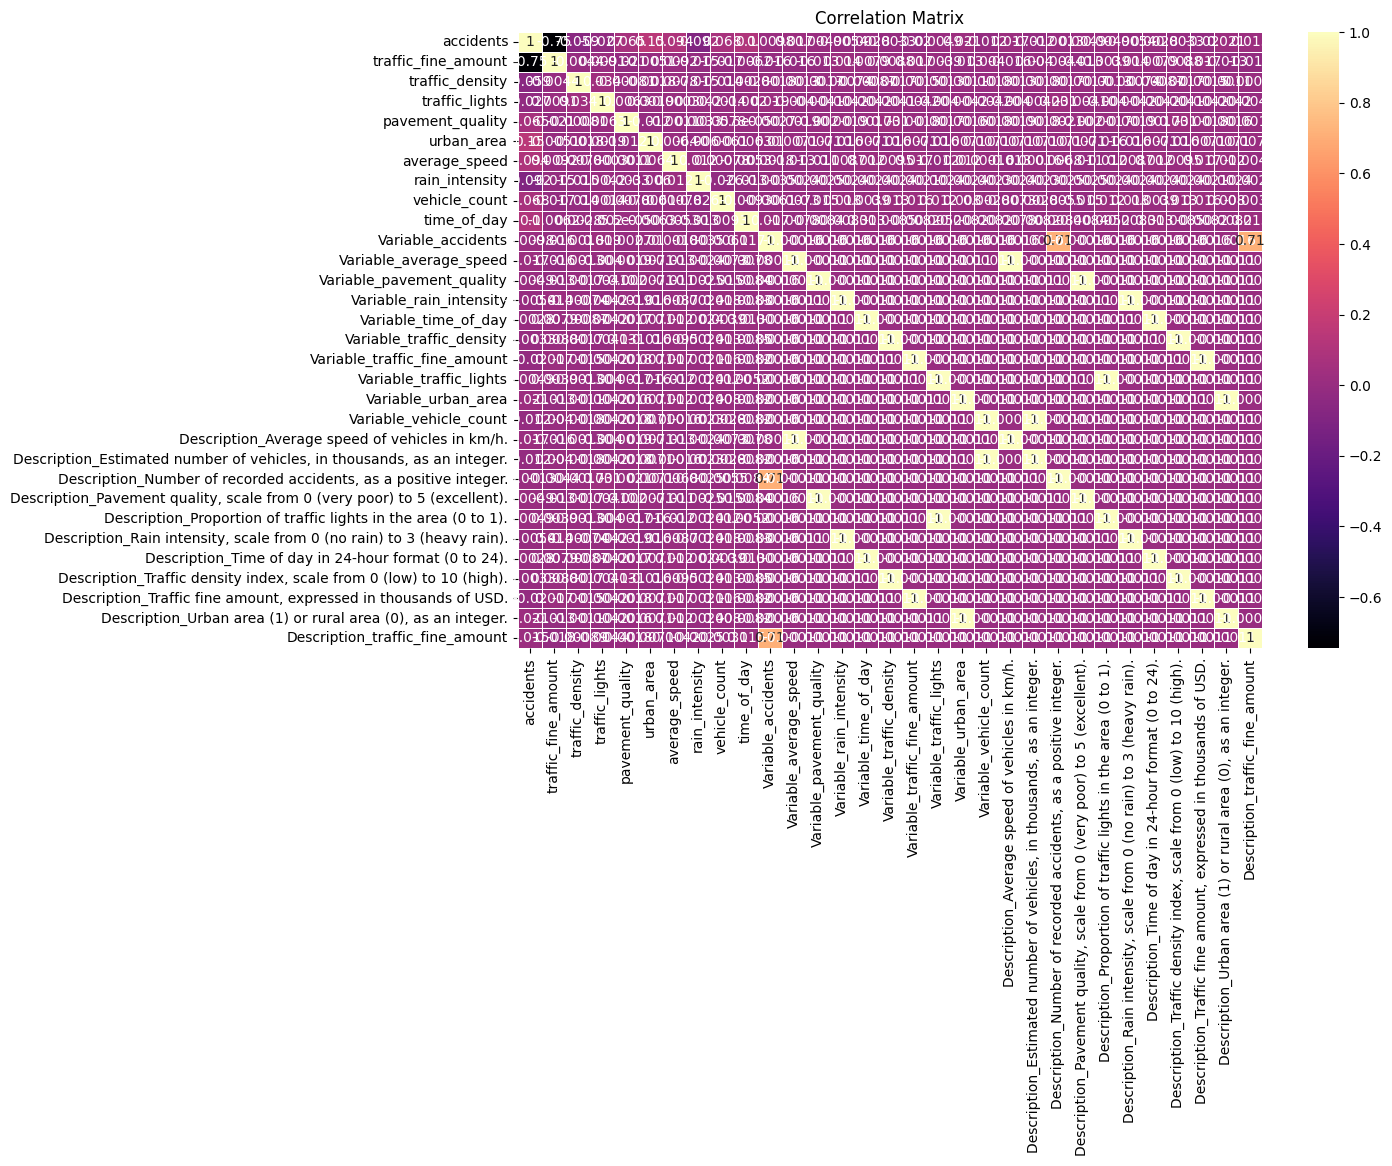

In [8]:
# Made a correlation Matrix which is quite congested but it includes all possible column.
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



># Now, Let us conclude our Notebook, Thank You!

